# Exploratory Data Analysis on Happiness Around The World

The World Happiness Report ranks 156 countries on how happy their citizens perceive themselves to be with each country receiving an overall score from 1-10 with 1 being the lowest level of happiness and 10 being the highest. Social support, GDP per capita, pereceptions of corruption among other variables are also scored from 0 to 1, likewise 0 being the lowest and 1 being the highest. 

The data I am going to analyse was obtained from kaggle (https://www.kaggle.com/mathurinache/world-happiness-report), I will specifically explore the 2020 dataset. 

I will be investigating what factors most strongly contribute to a nations happiness, the relationship between variales in the dataset and what the happiest countries have in common compared to the satistically lowest ranked countries for happiness.

The data will be computed using Numpy and Pandas, whilst Seaborn and Matplotlib will be used for data visualisation.

## Downloading the Dataset

Before we can start analysing the data we will first need to download it, we will use the opendatasets Python library which allows us to download datasets within Jupyter notebooks.

In [1]:
!pip install opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/mathurinache/world-happiness-report' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: stankarzhev
Your Kaggle Key: ········


100%|██████████| 53.9k/53.9k [00:00<00:00, 456kB/s]

The dataset has been downloaded and extracted.

The variable data_dir is set to the name of the directory where the datasets are located.

In [4]:
data_dir = './world-happiness-report'

The os module provides functions for interacting with OS and the filesystem, we'll use it here to list all the files located in the world-happiness-report directory.

In [6]:
import os
os.listdir(data_dir)

['2020.csv', '2019.csv', '2018.csv', '2015.csv', '2016.csv', '2017.csv']

## Data Preparation and Cleaning

Before we can begin analysing the data we will first need to load it into a data frame using Pandas. Once we have done this, we will explore the shape of the data frame i.e. how many columns and rows it contains along with the range of values. We should also handle any missing, incorrect or invalid data, finally we may wish to remove any columns that we don't deem necessary for analysis, create additional columns, parse the data or merge multiple datasets.



We will analyse the 2020 csv file, Pandas allows us to read csv files into a dataframe using read_csv, specifying the location of the file as the argument, we can save this as a variable.

In [7]:
import pandas as pd
happiness_raw_df = pd.read_csv('./world-happiness-report/2020.csv')

In [8]:
happiness_raw_df

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


We can use the .info method to obtain basic information such as the data types for each column and how many non null rows each column contains. 

In [9]:
happiness_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

This data set contains 153 rows of data and 20 columns, with 18 of those columns being of the data type float.

Fortunately for this data set we do not have any missing, incorrect or invalid data so we will not be modifying/removing any data. If the dataset contained any errors such as missing values or invalid data we would most likely have to discard the row entirely as replacing it with 0 may not be a fair reflection of that country's score for that particular variable. 

Before we proceed let's take a look a closer look at the columns in this dataset.

In [10]:
happiness_raw_df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

20 Columns of data can be a bit overwhelming to deal with and in this case we are better off without some columns, we'll delete the explained by columns, upper and lower whisker and dystopia residual columns using the .drop method, axis is set to 1 which refers to columns, whereas axis = 0 would refer to rows.

In [11]:
happiness_df = happiness_raw_df.drop(['Standard error of ladder score', 
                                      'upperwhisker', 
                                      'lowerwhisker', 
                                     'Ladder score in Dystopia',
                                     'Explained by: Log GDP per capita',
                                     'Explained by: Social support',
                                      'Explained by: Healthy life expectancy',
                                      'Explained by: Freedom to make life choices',
                                      'Explained by: Generosity',
                                      'Explained by: Perceptions of corruption',
                                      'Dystopia + residual'],
                                     axis=1)

In [12]:
happiness_df

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807
149,Rwanda,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541
150,Zimbabwe,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237
151,South Sudan,Sub-Saharan Africa,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417


Now that we have removed all the non essential data, the dataframe is much more organised, we could also change the indices to match the rank of each country for example Finland has the highest ladder score (happiness score) and should therefore have a rank of 1. We can achieve this using the numpy arange method, which will ensure the index column starts counting from 1 instead of 0.

In [13]:
import numpy as np 
happiness_df.index = np.arange(1, len(happiness_df)+1)
happiness_df

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
1,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
2,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
3,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
4,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
5,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...,...
149,Central African Republic,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807
150,Rwanda,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541
151,Zimbabwe,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237
152,South Sudan,Sub-Saharan Africa,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417


Now that we have every country ranked by ladder score rather than index, we can give this column a descriptive name instead of leaving it blank.

In [14]:
happiness_df.index.name = 'Rank'
happiness_df

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Rank,,,,,,,,,
1,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
2,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
3,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
4,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
5,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...,...
149,Central African Republic,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807
150,Rwanda,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541
151,Zimbabwe,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237


Using the rename method we can rename ladder score to happiness score to make it clearer what this column indicates.

In [15]:
happiness_df = happiness_df.rename(columns={'Ladder score':'Happiness score'})

We can use the describe method to view stastical information about each column such as the mean, standard deviation, range of values and the number of items.

In [16]:
happiness_df.describe()

,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120
std,1.11227,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172
min,2.56690,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784
25%,4.72410,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019
50%,5.51500,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122
75%,6.22850,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151
max,7.80870,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585


The last thing we can do before exploring the data in greater depth is to convert the logged GDP per capita column into just GDP per capita to get a better idea of the average amount earned per person in a given country.

In [17]:
happiness_df['Logged GDP per capita'] = np.exp(happiness_df['Logged GDP per capita'])

In [18]:
happiness_df

,Country name,Regional indicator,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Rank,,,,,,,,,
1,Finland,Western Europe,7.8087,41742.161744,0.954330,71.900825,0.949172,-0.059482,0.195445
2,Denmark,Western Europe,7.6456,47762.740162,0.955991,72.402504,0.951444,0.066202,0.168489
3,Switzerland,Western Europe,7.5599,58684.609949,0.942847,74.102448,0.921337,0.105911,0.303728
4,Iceland,Western Europe,7.5045,47693.918310,0.974670,73.000000,0.948892,0.246944,0.711710
5,Norway,Western Europe,7.4880,65369.027523,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...,...
149,Central African Republic,Sub-Saharan Africa,3.4759,753.824978,0.319460,45.200001,0.640881,0.082410,0.891807
150,Rwanda,Sub-Saharan Africa,3.3123,1998.404382,0.540835,61.098846,0.900589,0.055484,0.183541
151,Zimbabwe,Sub-Saharan Africa,3.2992,2606.364687,0.763093,55.617260,0.711458,-0.072064,0.810237


We can rename this modified column to give it a more appropiate name

In [19]:
happiness_df = happiness_df.rename(columns={'Logged GDP per capita': 'GDP per capita'})
happiness_df

,Country name,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Rank,,,,,,,,,
1,Finland,Western Europe,7.8087,41742.161744,0.954330,71.900825,0.949172,-0.059482,0.195445
2,Denmark,Western Europe,7.6456,47762.740162,0.955991,72.402504,0.951444,0.066202,0.168489
3,Switzerland,Western Europe,7.5599,58684.609949,0.942847,74.102448,0.921337,0.105911,0.303728
4,Iceland,Western Europe,7.5045,47693.918310,0.974670,73.000000,0.948892,0.246944,0.711710
5,Norway,Western Europe,7.4880,65369.027523,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...,...
149,Central African Republic,Sub-Saharan Africa,3.4759,753.824978,0.319460,45.200001,0.640881,0.082410,0.891807
150,Rwanda,Sub-Saharan Africa,3.3123,1998.404382,0.540835,61.098846,0.900589,0.055484,0.183541
151,Zimbabwe,Sub-Saharan Africa,3.2992,2606.364687,0.763093,55.617260,0.711458,-0.072064,0.810237


## Exploratory Analysis and Visualization

In this section we will start to explore interesting satistics for numeric columns, explore distributions of columns using histograms, investigate relationships between columns using scatter plots and bar charts and detail the insights we discover from doing this exploratory analysis.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [30]:
happiness_df

,Country name,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Rank,,,,,,,,,
1,Finland,Western Europe,7.8087,41742.161744,0.954330,71.900825,0.949172,-0.059482,0.195445
2,Denmark,Western Europe,7.6456,47762.740162,0.955991,72.402504,0.951444,0.066202,0.168489
3,Switzerland,Western Europe,7.5599,58684.609949,0.942847,74.102448,0.921337,0.105911,0.303728
4,Iceland,Western Europe,7.5045,47693.918310,0.974670,73.000000,0.948892,0.246944,0.711710
5,Norway,Western Europe,7.4880,65369.027523,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...,...
149,Central African Republic,Sub-Saharan Africa,3.4759,753.824978,0.319460,45.200001,0.640881,0.082410,0.891807
150,Rwanda,Sub-Saharan Africa,3.3123,1998.404382,0.540835,61.098846,0.900589,0.055484,0.183541
151,Zimbabwe,Sub-Saharan Africa,3.2992,2606.364687,0.763093,55.617260,0.711458,-0.072064,0.810237


Firstly we can visualise the overall distribution for happiness using a histogram. We can specify the number of bins (intervals) that we want.

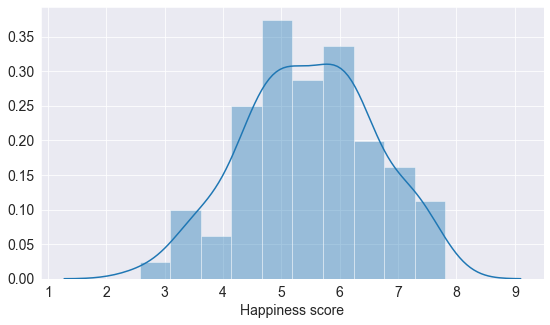

In [34]:
sns.distplot(happiness_df['Happiness score'], bins=10);

From this histogram we can see that most countries are within the 4.5 - 6 range for happiness, very few countries are at the lower end (scores less than 4.5). However we can also see that there are more countries in the upper end (greater than 6) than there are at the lower end (less than 4.5). 

Another interesting statistic that we can compute is the average level of happiness by using the mean method.

In [35]:
happiness_df['Happiness score'].mean()

5.47323986284967

The average level of happiness globally is 5.47, this seems accurate as the histogram showed that most countries were ranked between 4.5 and 6 for happiness. We previously used the .describe method to view stastical information about each column, it can be useful in this context to make sense of the mean and the distribution of happiness.

In [37]:
happiness_df['Happiness score'].describe()

count    153.00000
mean       5.47324
std        1.11227
min        2.56690
25%        4.72410
50%        5.51500
75%        6.22850
max        7.80870
Name: Happiness score, dtype: float64

From this statistical data we can see that the happiest country in the world has a score of 7.80, this is much higher than the average level of happiness globally at 5.47. The standard deviation of happiness is 1.11, this means that assuming a normal distribution, 68% of countries are within one standard deviation of the mean i.e. 68% of countries fall in the 4.36 - 6.58 range for overall happiness. 

Now we can start to investigate if any columns have any unique relationships, the first one we can take a look at is if there is a relationship between social support and happiness and if so what type of a relationship this is. We can do this using a scatterplot.

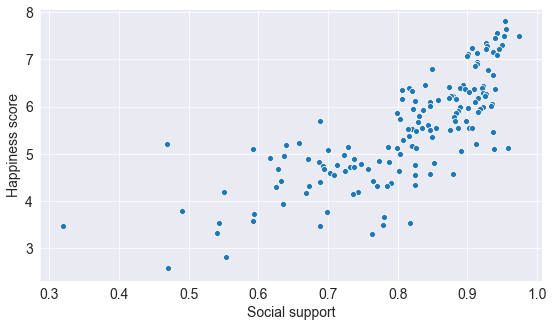

In [38]:
sns.scatterplot(x=happiness_df['Social support'], y=happiness_df['Happiness score']);

From this visualisation we can see that the overall trend is that there is a positive correlation between social support and happiness i.e. greater social support leads to greater levels of happiness. However the trend is not as linear or strong as we might have assumed, there are a few countries which deviate from the trend. For instance there are multiple data points where social support can be as high as 0.7 - 0.8 and yet happiness is below the global average. Therefore, although social support has a positive correlation with happiness score it may not always be essential to the happiness of a country's citizens.

We can also explore if living in certain regions is likely to affect happiness, we can visualise this using a bar plot.

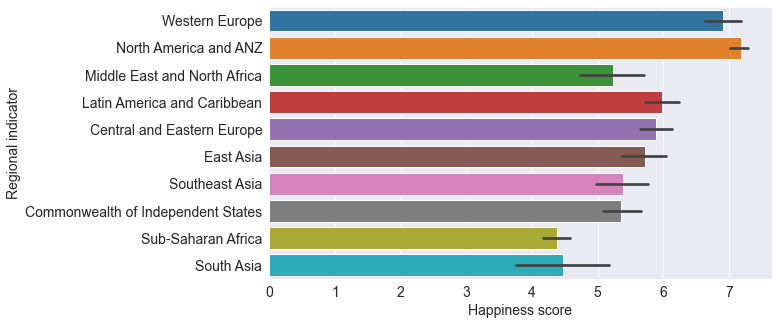

In [39]:
sns.barplot(x=happiness_df['Happiness score'], y=happiness_df['Regional indicator']);

This bar plot automatically computes the mean for every region and this is illustrated by the height of the bars, the lines cutting the bars represent the amount of variation for each regions happiness score. We can see that North America, Australia and New Zealand is on average the happiest region with Western Europe not too far behind but with greater variation. Sub-Saharan Africa and South Asia have the lowest average levels of happiness, but the variation for South Asian countries is far greater. These two regions are also less economically developed than the remaining regions, therefore we might hypothesize that GDP per capita also plays an important role in happiness.

We can also explore the relationship between GDP per capita and the healthy life expectancy of a country using a scatter plot.

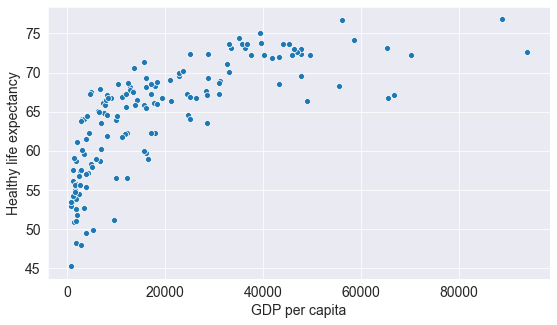

In [40]:
sns.scatterplot(x=happiness_df['GDP per capita'], y=happiness_df['Healthy life expectancy']);

There is a sharp increase in healthy life expectancy as GDP per capita increases from 0 up to 40,000, this is expected as citizens in more developed countries can readily access clean water, food and sanitisation which all contribute to healthy growth and development, leading to increased longevity. However this effect seems to level off once GDP per capita reaches 40,000. The scatter plot shows that at points where GDP is greater than 40,000, life expectancy does not continue to increase at the same rate. We can even see that in some cases the life expectancy is not as high as we might expect despite GDP exceeding 40,000 per capita. 

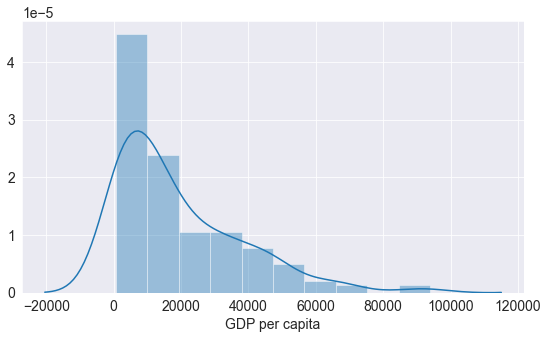

In [46]:
sns.distplot(happiness_df['GDP per capita'], bins=10);

We can also view the distribution of GDP per capita using a histogram, in this case the histogram is skewed to the left and the majority of countries citizens earn between 0-20,000, with few very countries having an average GDP per capita that exceeds 50,000.

## Asking and Answering Questions

In this section we will ask 6 meaningful and important questions about the dataset, the aim is to compute the data using Numpy/Pandas and visualise the data with Matplotlib/Seaborn where necessary, to present reasonable explanations. Alternatively we may also have to create new colums and group or aggregate data. 

#### Q1: How does region impact happiness?

In the previous section we briefly visualised how average levels of happiness vary for each region using a barplot. We will try to answer this question by examing to what extent region affects happiness and why this is the case.

We can view the top 10 countries by happiness score using the .head method

In [47]:
happiness_df.head(10)

,Country name,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Rank,,,,,,,,,
1,Finland,Western Europe,7.8087,41742.161744,0.954330,71.900825,0.949172,-0.059482,0.195445
2,Denmark,Western Europe,7.6456,47762.740162,0.955991,72.402504,0.951444,0.066202,0.168489
3,Switzerland,Western Europe,7.5599,58684.609949,0.942847,74.102448,0.921337,0.105911,0.303728
4,Iceland,Western Europe,7.5045,47693.918310,0.974670,73.000000,0.948892,0.246944,0.711710
5,Norway,Western Europe,7.4880,65369.027523,0.952487,73.200783,0.955750,0.134533,0.263218
6,Netherlands,Western Europe,7.4489,49647.917252,0.939139,72.300919,0.908548,0.207612,0.364717
7,Sweden,Western Europe,7.3535,47041.893277,0.926311,72.600769,0.939144,0.111615,0.250880
8,New Zealand,North America and ANZ,7.2996,36349.770888,0.949119,73.202629,0.936217,0.191598,0.221139
9,Austria,Western Europe,7.2942,46296.590590,0.928046,73.002502,0.899989,0.085429,0.499955


Here we can see that from the top 10 happiest countries in 2020, 9 of them are located in Western Europe, we can also see that social support and the freedom to make life choices are also very high for the top 10 happies countries with the values over 0.9 in most cases, we will explore these other factors separately.  

This dataset contains 153 rows, therefore making conclusions based only on the top 10 countries for happiness would not be fair or accurate. In order to really find out how strongly region affects happiness score we would need to take an average happiness score for every region and compare the results. We can achieve this by grouping the data by regional indicator and happiness score, finding the mean and sorting the data in descending order.

In [48]:
happiness_regional_df = happiness_df.groupby('Regional indicator')[['Happiness score']].mean()
happiness_regional_df = happiness_regional_df.sort_values('Happiness score', ascending=False)
happiness_regional_df

,Happiness score
Regional indicator,
North America and ANZ,7.173525
Western Europe,6.899219
Latin America and Caribbean,5.981786
Central and Eastern Europe,5.883818
East Asia,5.714850
Southeast Asia,5.383367
Commonwealth of Independent States,5.358342
Middle East and North Africa,5.227159
South Asia,4.475443


Similarly to what we saw with the barplot North America and ANZ (Australia and New Zealand) and Western Europe are not only the regions where happiness is rated the highest but they have a considerably higher score than the remaining regions. Overall it's clear that on average Western Europe, North America and ANZ are considerably happier than the rest of the world. It's evident that people could be more or less likely to be happy depending on the region that they live in. The two lowest regions; South Asia and Sub-Saharan Africa typically have lower GDP per capita values which leads us on to the next question.

#### Q2: Does a higher GDP per capita lead to higher levels of happiness?

Many of us will be familiar with the saying "Money doesn't buy happiness", let's investigate to what extent this is true.

We can create a seperate data frame by grouping regional indicator, happiness score and GDP per capita, next we can find the average of the last two columns using the .mean method. Finally we can sort the values in the GDP per capita column in descending order.

In [49]:
happiness_and_gdp_df = happiness_df.groupby('Regional indicator')[['Happiness score', 'GDP per capita']].mean()
happiness_and_gdp_df = happiness_and_gdp_df.sort_values('GDP per capita', ascending=False)
happiness_and_gdp_df

,Happiness score,GDP per capita
Regional indicator,,
Western Europe,6.899219,45969.195861
North America and ANZ,7.173525,45309.469380
East Asia,5.714850,34721.468073
Middle East and North Africa,5.227159,23843.470251
Central and Eastern Europe,5.883818,23014.613032
Southeast Asia,5.383367,19710.149232
Latin America and Caribbean,5.981786,13070.496477
Commonwealth of Independent States,5.358342,12268.947472
South Asia,4.475443,6551.903701


The top 2 regions for happiness and GDP are the Western Europe and North America and ANZ. An interesting observation is that Latin America and Carribean ranks 7th overall for GDP per capita yet this region is still the 3rd happiest overall. This could lead us to believe that GDP per capita does have an impact on happiness but this relationship is only true up to a certain point. There could be other variables to account for the high happiness score other than GDP in the case of Latina America and Carribean.  

Using a scatter plot we can visualise the relationship between happiness and GDP per capita, specifying regional indicator for the hue argument will allow us see the region each data point corresponds to.

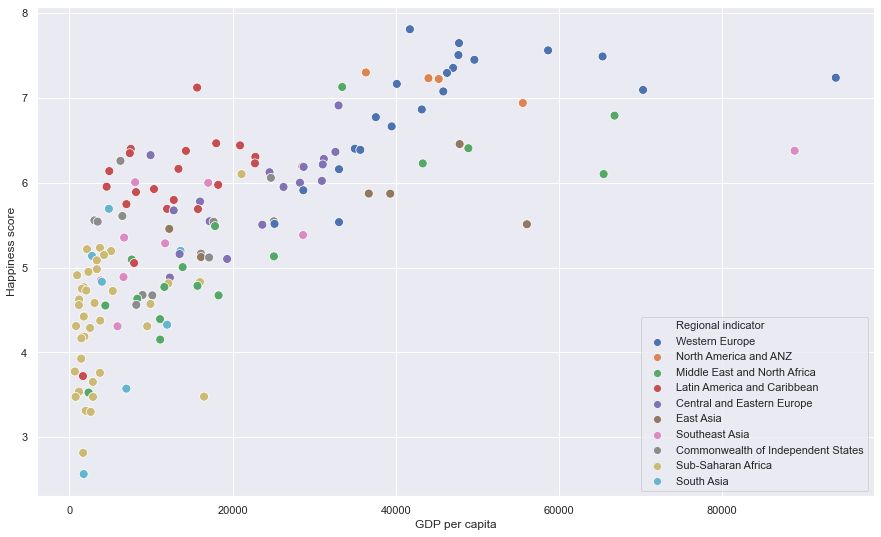

In [50]:
sns.set(rc={'figure.figsize':(15,9)})
sns.scatterplot(x=happiness_df['GDP per capita'], y=happiness_df['Happiness score'], hue=happiness_df['Regional indicator'], s=80);

This figure is very similar to the healthy life expectancy vs GDP per capita scatter plot that we previously generated. We can therefore come to a familiar conclusion: GDP per capita does have a positive effect on happiness, however this effect seems to plateau at different points for each region, i.e. up to a point further increases in GDP will not elevate happiness. For example we can see that for Western Europe happiness steadily increases with GDP up until the 45,000 - 50,000 point where further increases yield the same levels of happiness. This is simarily observed with Middle East and North Africa. In general a greater income will likely benefit the overall happiness of a region but this is not a linear relationship and it seems to plateau at different points for different regions.

#### Q3: How strongly does social support affect healthy life expectancy?

In order to get an idea of what a good value for healthy life expectancy is we can calculate the global average and then compare how far off different countries are and why that might be.

In [53]:
happiness_df['Healthy life expectancy'].mean()

64.44552916509808

If we sort the original data set in terms of social support, it's clear that social support positively contributes to healthy life expectancy. The majority of countries in the top 20 for social support also have some of the highest levels of healthy life expectancy, with most surpassing the age of 70. But as usual the trend is not without exceptions, the most prominent one is Turkmenistan. Turkmenistan ranks second in the world for social support yet the life expectancy is about 10 years lower than the majority of the countries that rank highest for social support. Comparing the healthy life expectancy with the world average shows that there is no significant difference, with Turkmenistan ranking 2 years less than the mean.

It may well be that social support does positively contribute to happiness however in this case the very high levels of perception of corruption may offset this. Bulgaria is another example of this, with a high level of social support yet a relatively low healthy life expectancy compared to the remaining countries in the top 20 and very high levels of perception of corruption. Yet Bulgaria still exceeds the average life expectancy by 2 years.

In [51]:
happiness_df.sort_values('Social support', ascending=False).head(20)

,Country name,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Rank,,,,,,,,,
4,Iceland,Western Europe,7.5045,47693.918310,0.974670,73.000000,0.948892,0.246944,0.711710
95,Turkmenistan,Commonwealth of Independent States,5.1191,17120.512243,0.958966,62.211708,0.826457,0.187672,0.883692
2,Denmark,Western Europe,7.6456,47762.740162,0.955991,72.402504,0.951444,0.066202,0.168489
1,Finland,Western Europe,7.8087,41742.161744,0.954330,71.900825,0.949172,-0.059482,0.195445
5,Norway,Western Europe,7.4880,65369.027523,0.952487,73.200783,0.955750,0.134533,0.263218
8,New Zealand,North America and ANZ,7.2996,36349.770888,0.949119,73.202629,0.936217,0.191598,0.221139
12,Australia,North America and ANZ,7.2228,45278.895051,0.944855,73.604538,0.915432,0.190460,0.415169
3,Switzerland,Western Europe,7.5599,58684.609949,0.942847,74.102448,0.921337,0.105911,0.303728
16,Ireland,Western Europe,7.0937,70331.729485,0.942082,72.300789,0.886983,0.145785,0.357184


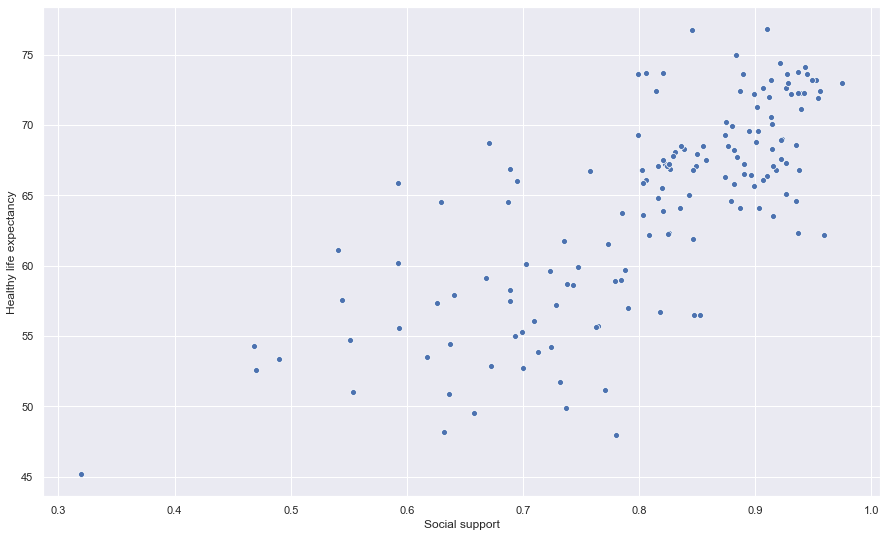

In [54]:
sns.scatterplot(x=happiness_df['Social support'], y=happiness_df['Healthy life expectancy']);

This figure illustrates the weak positive correlation between social support and life expectancy. Although it's important to note that the some of the countries with the greatest levels of social support (0.85+) also have the greatest longevity. However, equally as important is the huge difference in life expectancy for countries who have social support scores of 0.6 - 0.8. There are instances where two different countries with a 0.6 and a 0.8 social support score have virtually the same life expectancy. Another example is a few particular data points (countries) rank at approx 0.65 for social support but the gap between them in life expectancy is at times as big as 8 - 10 years. 

#### Q4: Are greater levels of perceptions of corruption likely to cause unhappiness?

Ranking the top 20 countries based on level of perceptions of corruptions results in the following data frame. 

In [55]:
corruption_df = happiness_df.sort_values('Perceptions of corruption', ascending=False).head(20)
corruption_df

,Country name,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Rank,,,,,,,,,
96,Bulgaria,Central and Eastern Europe,5.1015,19328.171271,0.937840,66.803978,0.745178,-0.143908,0.935585
47,Romania,Central and Eastern Europe,6.1237,24528.328650,0.825162,67.207237,0.842823,-0.197815,0.934300
69,Bosnia and Herzegovina,Central and Eastern Europe,5.6741,12782.306935,0.829204,67.808136,0.651353,0.098275,0.933769
153,Afghanistan,South Asia,2.5669,1742.124430,0.470367,52.590000,0.396573,-0.096429,0.933687
35,Kosovo,Central and Eastern Europe,6.3252,9941.066881,0.820727,63.885555,0.861536,0.190934,0.922328
123,Ukraine,Commonwealth of Independent States,4.5607,8190.176186,0.878879,64.606781,0.663082,-0.030934,0.920637
37,Slovakia,Central and Eastern Europe,6.2806,31186.784489,0.922494,68.906342,0.749953,-0.124409,0.918096
79,Croatia,Central and Eastern Europe,5.5047,23644.248454,0.874624,70.214905,0.714839,-0.128538,0.916495
70,Moldova,Commonwealth of Independent States,5.6075,6481.545895,0.843314,65.013016,0.721609,-0.037741,0.913314


Region again seems to play a vital role with almost half of the countries with the highest perceptions of corruption being located in Central and Eastern Europe. Let's also find out what the average score for perceptions of corruption on a global scale is, this will help us in deciding how well or how badly countries rank in this category relative to the mean. 

In [56]:
happiness_df['Perceptions of corruption'].mean()

0.733120220875817

A global average of 0.73 for perceptions of corruption is very high considering a scale of 0 to 1, 1 being the highest. Let's quickly take a look at the distribution for this variable, using a histogram.

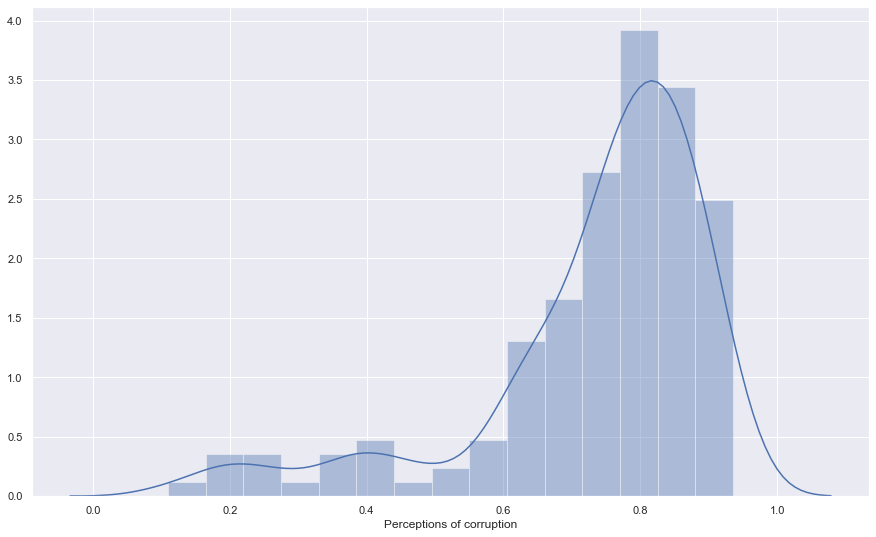

In [57]:
sns.distplot(happiness_df['Perceptions of corruption'], bins=15);

As expected the histogram is skewed to the right which most values falling between the 0.7 - 0.9 range which accounts for the high mean, in this case the mean is greater than the median which results in this shape.

From the top 20 we can filter out all the countries that rank below the average level of happiness.

In [58]:
corruption_df = corruption_df[corruption_df['Happiness score'] < 5.47]
corruption_df

,Country name,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Rank,,,,,,,,,
96,Bulgaria,Central and Eastern Europe,5.1015,19328.171271,0.937840,66.803978,0.745178,-0.143908,0.935585
153,Afghanistan,South Asia,2.5669,1742.124430,0.470367,52.590000,0.396573,-0.096429,0.933687
123,Ukraine,Commonwealth of Independent States,4.5607,8190.176186,0.878879,64.606781,0.663082,-0.030934,0.920637
111,Lebanon,Middle East and North Africa,4.7715,11634.427854,0.824338,67.106583,0.551358,-0.061215,0.902256
90,Macedonia,Central and Eastern Europe,5.1598,13501.978470,0.820392,67.504425,0.738841,-0.019877,0.897491
105,Albania,Central and Eastern Europe,4.8827,12307.087599,0.671070,68.708138,0.781994,-0.042309,0.896304
149,Central African Republic,Sub-Saharan Africa,3.4759,753.824978,0.319460,45.200001,0.640881,0.082410,0.891807


7 countries are left from the top 20 most of which are well below the average level of happiness, another thing they have in common is that they are all well above the average score for perceptions of corruption. Furthermore, many also have a relatively low GDP per capita which could also negatively contribute to their happiness scores.

Additionally we can explore which region has the highest average score for perceptions of corruption and how that effects happiness.

In [59]:
corruption_df = happiness_df.groupby('Regional indicator')[['Happiness score', 'Perceptions of corruption']].mean()
corruption_df = corruption_df.sort_values('Perceptions of corruption', ascending=False)
corruption_df 

,Happiness score,Perceptions of corruption
Regional indicator,,
Central and Eastern Europe,5.883818,0.850859
Latin America and Caribbean,5.981786,0.801526
South Asia,4.475443,0.790656
Sub-Saharan Africa,4.383495,0.770404
Middle East and North Africa,5.227159,0.761510
Commonwealth of Independent States,5.358342,0.746387
Southeast Asia,5.383367,0.704920
East Asia,5.714850,0.702266
Western Europe,6.899219,0.528730


It seems that the two happiest regions overall Western Europe and North America and ANZ consistenly rank considerably better than the remaining regions, in this case they have the lowest levels of perceptions of corruption not to mention their scores are also much lower than the global average for perceptions of corruption (0.73). Despite Latin America and Carribean and Central and Eastern Europe on average ranking 3rd and 4th for happiness they are on the opposite end for perceptions of corruption, ranking 1st and 2nd on average, followed by the two least happiest regions South Asia and Sub-Saharan Africa. All four of these regions also surpass the average for perceptions of corruption, with the top two significantly higher than the mean.

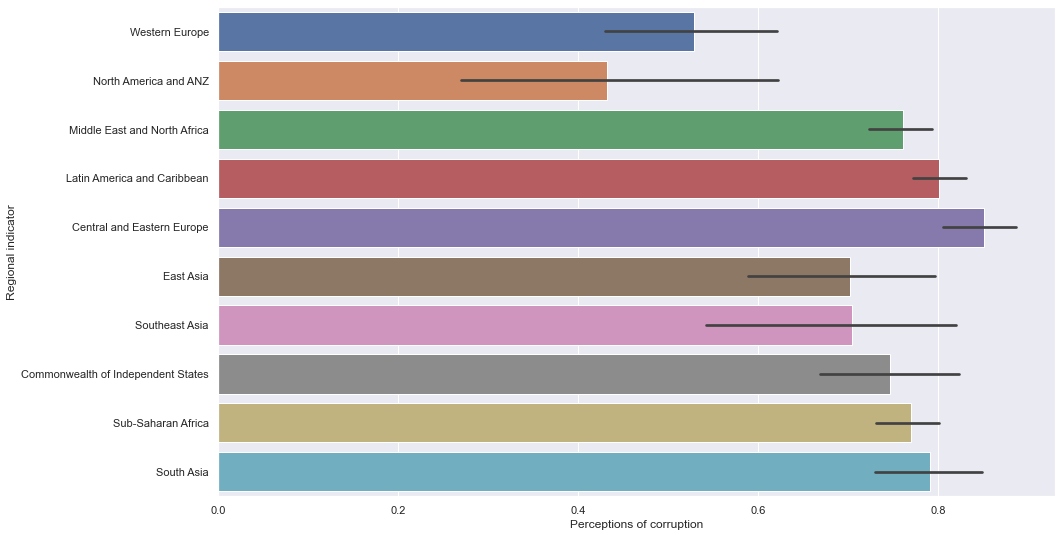

In [60]:
sns.barplot(x=happiness_df['Perceptions of corruption'], y=happiness_df['Regional indicator']);

A barplot allows us to visualise these averages along with the variation that is present for each region. It's interesting to note that Western Europe and North America and ANZ the two areas with the lowest average corruption also exhibit some of the greatest variation for this category. The highest ranked locations for corruption display the opposite relationship with less variation occurring. 

Overall we have obserbed that Central and Eastern Europe is the region where perceptions of corruption is the highest but this doesn't seem to have as detrimental effect as expected, as this region still ranks 4th overall for happiness. The same can be said for Latin America and the Carrbibean which ranks 2nd for corruption yet somehow is still the 3rd overall for happiness. The familiar trend of Western Europe and North America and ANZ being the best ranked in each category still holds true here, as well as Sub-Saharan Africa and South Asia ranking near the highest levels of corruption and ranking poorly for other variables.

#### Q5: Are countries/regions with lower GDP per capita likely to have more corruption?

We may speculate that higher levels of corruption may impact a country economically, in turn translating to lower levels of GDP per capita in comparison to countries/regions with less corruption. If we group the countries by region and compute the mean values for happiness, corruption and GDP we obtain the following data frame.

In [61]:
corruption_gdp_df = happiness_df.groupby('Regional indicator')[['Happiness score', 'Perceptions of corruption', 'GDP per capita']].mean()
corruption_gdp_df = corruption_gdp_df.sort_values('GDP per capita', ascending=True)
corruption_gdp_df 

,Happiness score,Perceptions of corruption,GDP per capita
Regional indicator,,,
Sub-Saharan Africa,4.383495,0.770404,4146.357413
South Asia,4.475443,0.790656,6551.903701
Commonwealth of Independent States,5.358342,0.746387,12268.947472
Latin America and Caribbean,5.981786,0.801526,13070.496477
Southeast Asia,5.383367,0.704920,19710.149232
Central and Eastern Europe,5.883818,0.850859,23014.613032
Middle East and North Africa,5.227159,0.761510,23843.470251
East Asia,5.714850,0.702266,34721.468073
North America and ANZ,7.173525,0.431717,45309.469380


Additionally we can compute the mean GDP per capita globally to get a sense of what is high and low in terms of GDP.

In [62]:
happiness_df['GDP per capita'].mean()

19334.494239403026

The regions with the lowest GDP per capita all have values that surpass the global average for corruption (0.73), but Central and Eastern Europe has an average GDP that surpasses the global average and yet has the highest corruption levels. The Middle east and North Africa have a similar GDP to Central and Eastern Europe yet rank near the middle for corruption and only slighly above average (+0.03). 

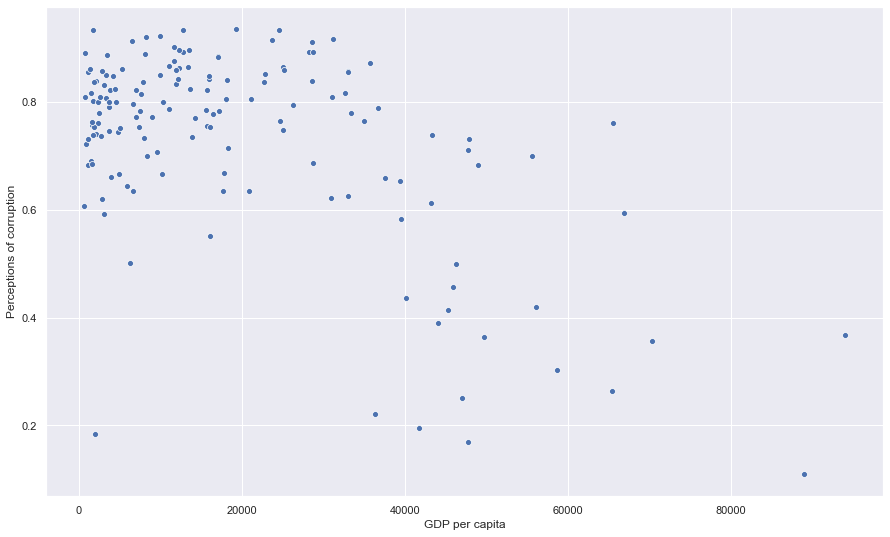

In [63]:
sns.scatterplot(y=happiness_df['Perceptions of corruption'], x=happiness_df['GDP per capita']);

The above visualisation shows a big cluster of countries in the top left hand corner, i.e. the countries with the lowest GDP per capita do in fact have the greatest scores for perceptions of corruption. It is fairly likely that a less economically developed country will have greater levels of corruption but it is important to note that some countries with an average GDP of 30,000 (well above global average) still have very high levels of corruption ranking as high as 0.85 on the corruption scale. After the 40,000 GDP point the majority of countries rank at reasonably low values with respect to the average global corruption (0.73) level.

#### Q6: What is the impact of freedom to make choices on happiness?

One factor we have not yet considered is the freedom to make life choices, ultimately we may believe this is vital for happiness but let's find out if this is really the case.

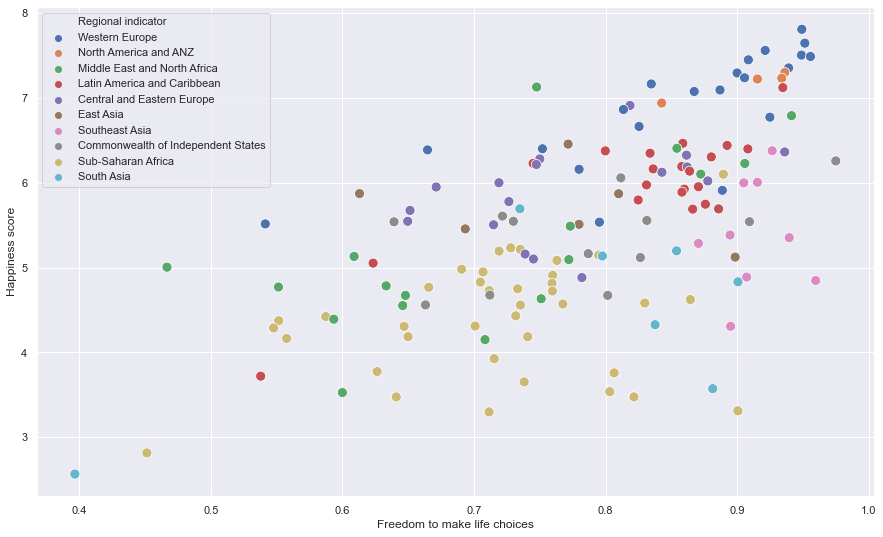

In [64]:
sns.scatterplot(x=happiness_df['Freedom to make life choices'], 
                y=happiness_df['Happiness score'],
                hue=happiness_df['Regional indicator'],
               s= 100);

One of the first things that stand out is the yellow data points (corresponding to countries in Sub-Saharan African) which consistenly rank below the average level of happiness of 5.47 despite freedom to make life choices reaching as high as 0.9, this may cause us to undermine the significance of  freedom to make life choices in boosting happiness for this region. Perhaps other factors are more influential and cause more unhappiness than the effect experienced by a high level of freedom. In contrast Western Europe exhibits a linear relationship with happiness steady increasing with freedom to make life choices. Latin America and Carribean display a similar relationship to Sub-Saharan Africa, the levels of happiness may not be impacted by increasing freedom but in every instance they are above the average happiness.

In [65]:
happiness_df.sort_values('Freedom to make life choices', ascending=False).head(20)

,Country name,Regional indicator,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Rank,,,,,,,,,
38,Uzbekistan,Commonwealth of Independent States,6.2576,6250.218512,0.926596,65.107574,0.974998,0.248427,0.501497
106,Cambodia,Southeast Asia,4.8484,3827.206057,0.773081,61.529968,0.959705,0.051911,0.822769
5,Norway,Western Europe,7.4880,65369.027523,0.952487,73.200783,0.955750,0.134533,0.263218
2,Denmark,Western Europe,7.6456,47762.740162,0.955991,72.402504,0.951444,0.066202,0.168489
1,Finland,Western Europe,7.8087,41742.161744,0.954330,71.900825,0.949172,-0.059482,0.195445
4,Iceland,Western Europe,7.5045,47693.918310,0.974670,73.000000,0.948892,0.246944,0.711710
21,United Arab Emirates,Middle East and North Africa,6.7908,66836.104497,0.849181,67.082787,0.941346,0.123451,0.594502
83,Vietnam,Southeast Asia,5.3535,6697.874505,0.849987,67.952736,0.939593,-0.094533,0.796421
7,Sweden,Western Europe,7.3535,47041.893277,0.926311,72.600769,0.939144,0.111615,0.250880


We can also explore the top 20 countries for freedom to make life choices, it's clear that this variable does effect happiness in a positive way, with almost all of these countries ranking well above the global average of happiness (5.47). The only exception is Cambodia, but the low levels of happiness could be due to the extremely low GDP and the high levels of corruption in this case. Otherwise 11 of the top 20 for freedom to make choices are also in the top 20 for happiness showing a close relationship between the two variables. 

## Inferences and Conclusion

We can summarise this analysis by making a few conclusions:

- The Western hemisphere of the world is considerably happier than the remaining regions, with happiness levels exceeding the global average.


- The nordic countries  Finland, Denmark, Iceland, Norway and Sweden are the most successful in terms of happiest citizens, ranking at 1st, 2nd, 4th, 5th and 7th in the world. This is no coincidence because they all share similar charatertists: high social support, above average GDP per capita, high healthy life exectancy, high freedom to make life choices and relatively low levels of percpetions of corruptions.


- The global distribution for happiness is pretty even, although there are more countries on the higher end (Scores surpassing 6) than there at the lower end of the scale (scores below 4.5).


- There is a disproportionate distribution for GDP per capita, as a result most countries in the world are at the lower end, with most citizens earning below 20,000 annually. 


- There is a strong correlation between social support and happiness, a common trait the happiest countries share is relatively high levels of social support, despite this some of the most corrupt and unhappiest countries also have remarkably high social support levels.


- GDP per capita generally has a positive effect on a country's happiness, but this effect seems either to level off or in some cases is less significant for different regions, although money may not be able to boost happiness considerably it still maintains a positive effect. 


- The positive effects of an increasing income are apparent with healthy life expectancy, there is a linear relationship between the two, but this effect seems to plateau at around 40,000 GDP, whereby further increases do not lead to an increase in happiness.


- The effects of elevated levels of social support on healthy life expectancy are not as effective as we may have assumed, this is evident in countries that have the same life expectancy but social support scores that vary significantly. 


- The citizens of the world generally perceive there to be a high degree of corruption on average, with a lower GDP per capita not necessarily indicating higher levels of corruption, but a common trait among the most corrupt countries is a noticeably low GDP in comparison to the global average.


- The effect of freedom to make life choices on happiness may be considered one of the weakest for regions where GDP is lower than the global average. On the other hand greater freedom scores lead to greater happiness in more econmically developed regions such as Western Europe. 

## References and Future Work

For future projects, we may compare the 2020 dataset to previous years and analyse how the different countries and regions have developed in terms of happiness, GDP, perceptions of corruption, freedom to make life choices and life expectancy. We can also figure out what the top ranked countries for happiness have in common each year, and if this criteria varies year to year or stays the same. Another interesting thing we can analyse is the significance of different variables on a year to year basis, i.e. does freedom to make life choices have the same effect in 2020 on happiness than it did in 2019.

**Useful Resources:**
- https://worldhappiness.report/ed/2020/
- https://www.kaggle.com/
- https://datasetsearch.research.google.com
- https://asq.org/quality-resources/histogram
- https://www.investopedia.com/terms/s/standarddeviation.asp
- https://numpy.org/doc/stable/
- https://pandas.pydata.org/docs/user_guide/index.html
- https://matplotlib.org/users/index.html
- https://seaborn.pydata.org/tutorial/function_overview.html